In [1]:
from sklearn.datasets import load_iris

# Load in our dataset
iris_data = load_iris()

In [2]:
print(iris_data.data[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
print(iris_data.target[0:5])

[0 0 0 0 0]


In [4]:
X=iris_data.data
y=iris_data.target

In [5]:
from sklearn import tree

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(X, y)


In [6]:
print(iris_data.data[100])
print(iris_data.target[100])

[6.3 3.3 6.  2.5]
2


In [7]:
classification_tree.predict([iris_data.data[100]])


array([2])

In [8]:
print(classification_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [9]:
tree.plot_tree(classification_tree, feature_names=iris_data.feature_names)

[Text(167.4, 199.32, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'petal length (

In [10]:
from sklearn.tree import export_text

print(export_text(classification_tree, feature_names=iris_data.feature_names ))

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Датасет titanic

In [11]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv("titanic_train.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.drop(['Name', 'Ticket','Cabin','Embarked'], axis='columns', inplace=True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [16]:
df.replace({'male':1, "female":0}, inplace=True);

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [19]:
df.dropna(inplace=True);
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


In [20]:
X=df.drop(["PassengerId", 'Survived'], axis='columns') 

In [21]:
y=df["Survived"]

In [22]:
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(X, y)

#версия отрисовки через библиотеку graphviz 
import graphviz 
dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],  
                     class_names='Survived',  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("titanic")

In [23]:
classification_tree = tree.DecisionTreeClassifier(max_depth=5)

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(X, y)

dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],  
                     class_names='Survived',  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("titanic")

In [24]:
from sklearn.metrics import classification_report

In [25]:
y_predicted=classification_tree.predict(X)

In [26]:
print(classification_report(y,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       424
           1       0.85      0.74      0.80       290

    accuracy                           0.84       714
   macro avg       0.85      0.83      0.84       714
weighted avg       0.85      0.84      0.84       714



In [27]:
#tree.plot_tree(clf.fit(iris.data, iris.target)) 
#from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline




In [28]:
import sklearn
sklearn.__version__

'0.22.1'

In [29]:
plt.figure(figsize=(9,9))

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

In [30]:
from sklearn.tree import plot_tree

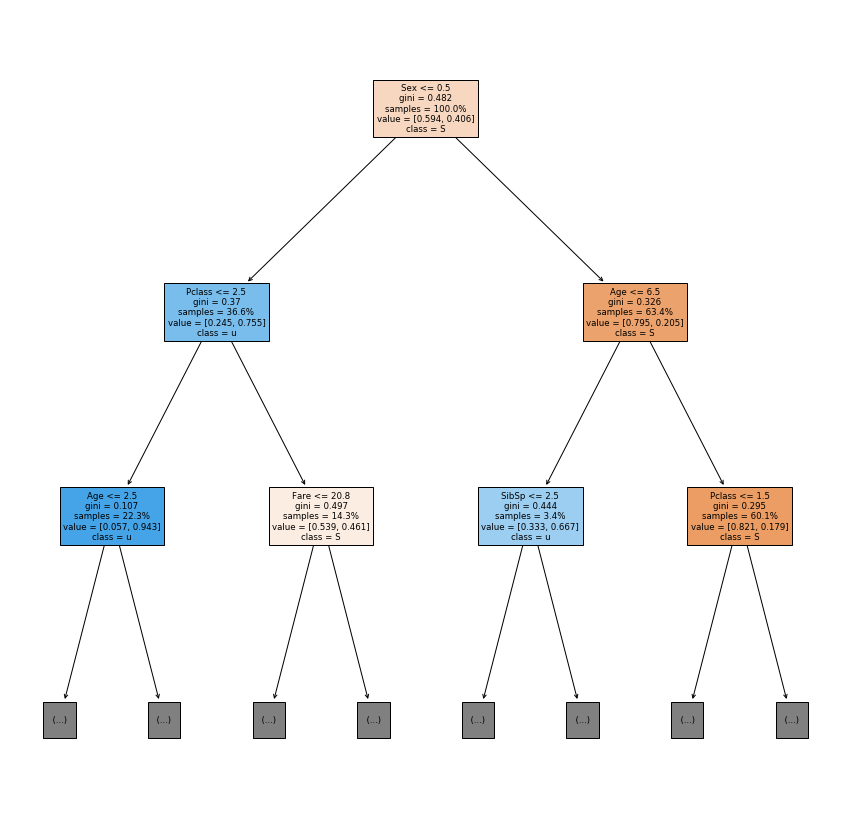

In [31]:
plt.figure(figsize=(15,15))
#clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(classification_tree, filled=True,proportion=True, max_depth=2,
          feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'],
          class_names='Survived')
plt.show()

#plt=tree.plot_tree(classification_tree, filled=True) 
